<a href="https://colab.research.google.com/github/hitesha14/Rising2021_Timeseries/blob/main/Copy_of_Time_Series_Characterstics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statsmodels Package**

**statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

# **Components of Time Series**

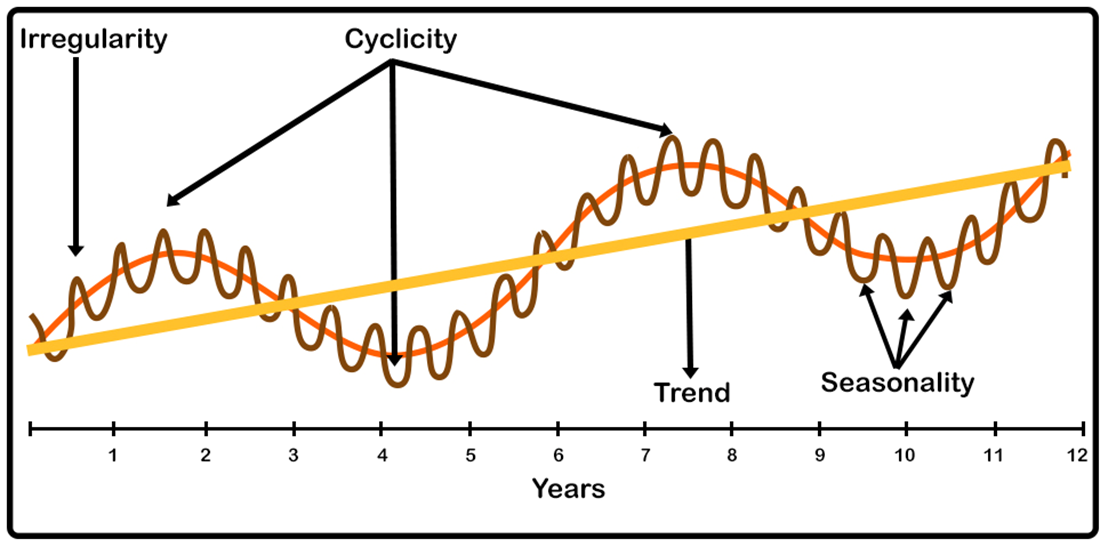

## **Import Packages**

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Now, let’s read our dataset to see what kind of data we have. As we see, the dataset has been classified into two columns; Month and Passengers traveling per month.

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Time_Series_AirPassengers.csv')
dataset.columns = ["Month", "Passengers"]
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


summary of the dataset in case there’s a row with an empty value. Let’s go ahead and check by doing this:

In [ ]:
dataset.isnull().sum()

Month         0
Passengers    0
dtype: int64

Now, what we will do is to confirm that the `Month` column is in `datetime` format and not string. Pandas .dtypes function makes this possible:

In [ ]:
dataset.dtypes

Month         object
Passengers     int64
dtype: object

We can see that Month column is of a generic object type which could be a string. Since we want to perform time related actions on this data, we need to convert it to a datetime format before it can be useful to us. Let’s go ahead and do this using to_datetime() helper function, let’s cast the Month column to a datetime object instead of a generic object:

In [ ]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Notice how we now have date field generated for us as part of the Month column. By default, the date field assumes the first day of the month to fill in the values of the days that were not supplied. Now, if we go back and confirm the type, we can see that it’s now of type datetime :

In [ ]:
dataset.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

## **Visualize the Time Series**

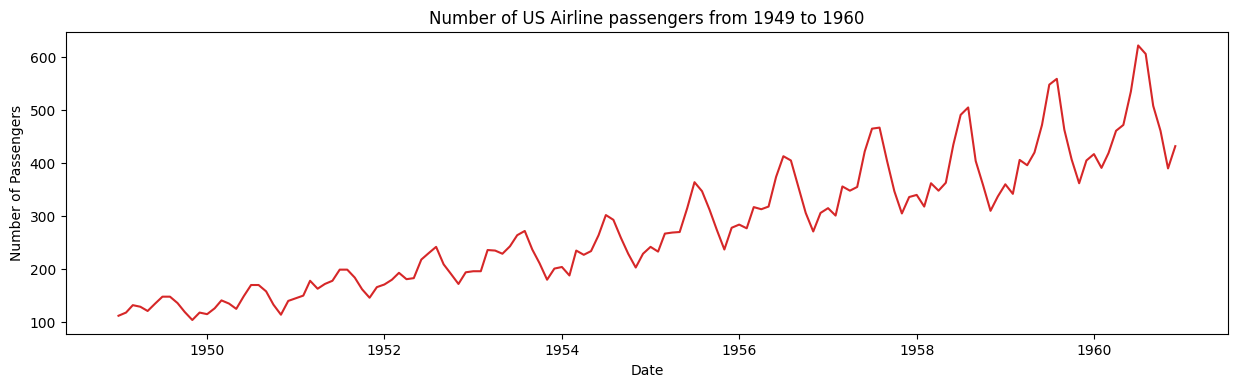

In [ ]:
import matplotlib.pyplot as plt 
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(dataset, x=dataset['Month'], y=dataset['Passengers'], title='Number of US Airline passengers from 1949 to 1960')



Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.



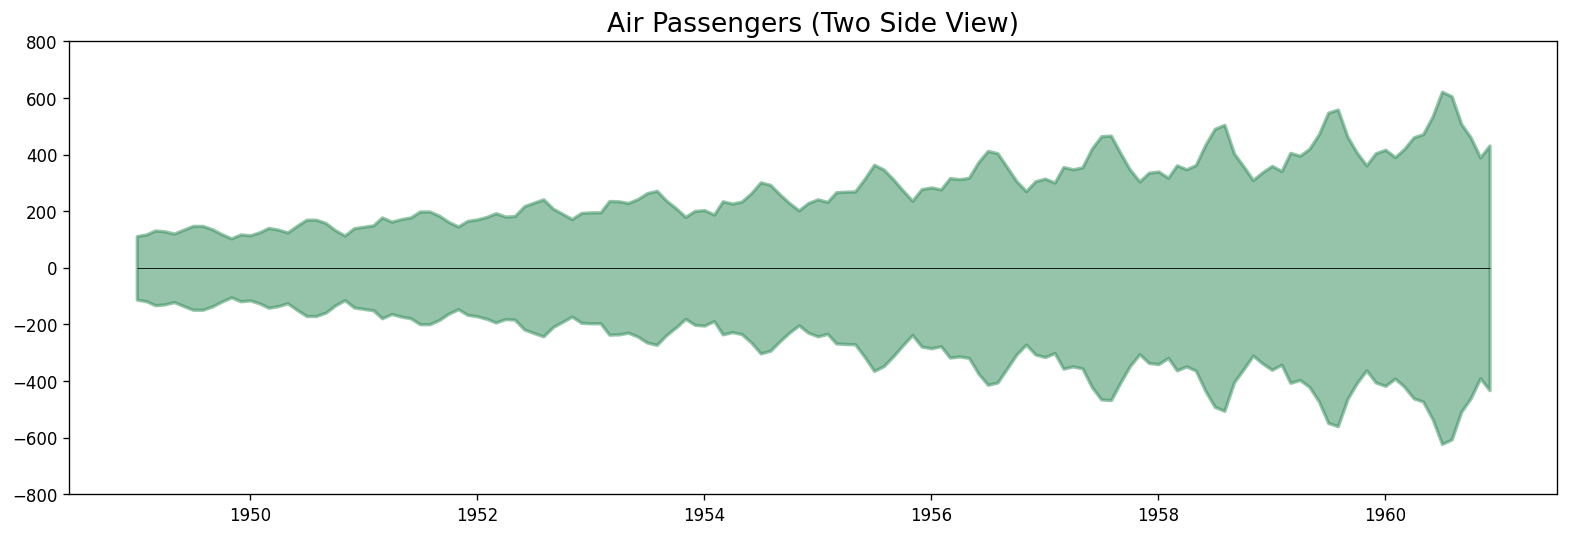

In [ ]:
x = dataset['Month'].values
y1 = dataset['Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(dataset['Month']), xmax=np.max(dataset['Month']), linewidth=.5)
plt.show()

Now, we need to set the datetime object as the index of the dataframe to allow us really explore our data. Let’s do this using the .set_index() method:

In [ ]:
dataset = dataset.set_index('Month')
dataset.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


We can see now that the Month column is the index of our dataframe. Let’s go ahead and create our plot to see what our data looks like

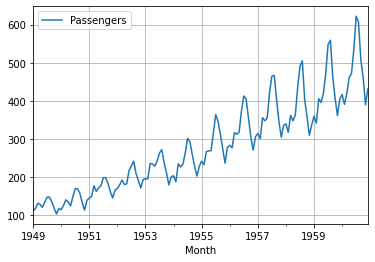

In [ ]:
dataset.plot(grid=True)

**Note** that in Time Series plots, time is usually plotted on the x-axis while the y-axis is usually the magnitude of the data.

Notice how the `Month` column was used as our `x-axis` and because we had previously casted our `Month column` to `datetime`, the year was specifically used to plot the graph.

##**Patterns in a Time Series**

### **Trend & Seasonality**

By now, you should notice an upward trend indicating that the airline would have more passenger over time. Although there are ups and downs at every point in time, generally we can observe that the trend increases. Also we can notice how the ups and downs seem to be a bit regular, it means we might be observing a seasonal pattern here too. Let’s take a closer look by observing some year’s data:

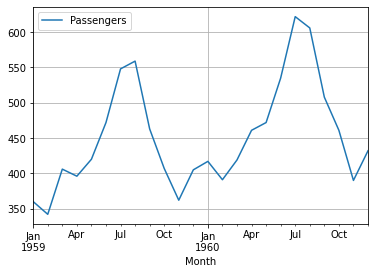

In [ ]:
from datetime import datetime
start_date = datetime(1959,1,1)
end_date = datetime(1960,12,1)
dataset[(start_date<=dataset.index) & (dataset.index<=end_date)].plot(grid=True)

As we can see in the plot, there’s usually a spike between July and September which begins to drop by October, which implies that more people travel between July and September and probably travel less from October.

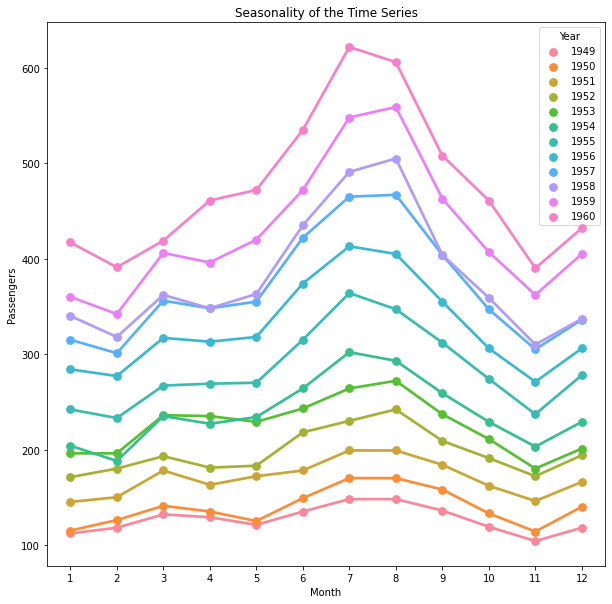

In [ ]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
import seaborn as sns
df_temp = dataset.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

### **Decomposition of Time Series**

 Decomposition techniques to to deconstruct our observation into several components, each representing one of the underlying categories of patterns.

There are a couple of models to consider during the Decomposition of Time Series data.


1. Additive Model: This model is used when the variations around the trend does not vary with the level of the time series. Here the components of a time series are simply added together using the formula: 

**`y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)`**

2. Multiplicative Model: Is used if the trend is proportional to the level of the time series. Here the components of a time series are simply multiplied together using the formula:

**`y(t) = Level(t) * Trend(t) * Seasonality(t) *Noise(t)`**

For the sake of this tutorial, we will use the additive model because it is quick to develop, fast to train, and provide interpretable patterns. We also need to import `statsmodels` which has a `tsa` (time series analysis) package as well as the `seasonal_decompose()` function we need:

#### **Additive Decomposition of Time Series**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


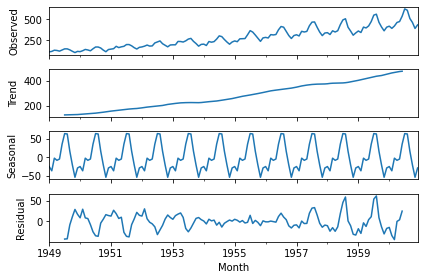

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset, model ='additive')
fig = decomposition.plot()

Now we have a much clearer plot showing us that the trend is going up, and the seasonality following a regular pattern.

#### **Multiplicative Decomposition of Time Series**

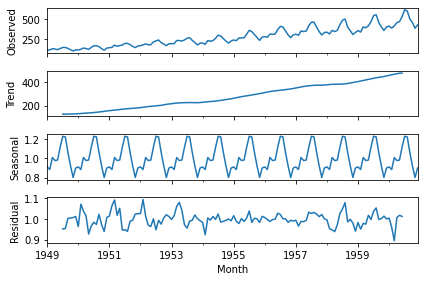

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset, model='multiplicative')
fig = decomposition.plot()



> * If we look at the residuals of the additive decomposition closely, it has some pattern left over.

> * The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.



One last thing we will do is plot the trend alongside the observed time series. To do this, we will use `Matplotlib’s .YearLocator()` function to set each year to begin from the month of `January month=1` , and month as the minor locator showing ticks for every 3 months (intervals=3). Then we plot our dataset (and gave it blue color) using the index of the dataframe as `x-axis` and the number of Passengers for the `y-axis`.

We did the same for the trend observations which we plotted in red color.

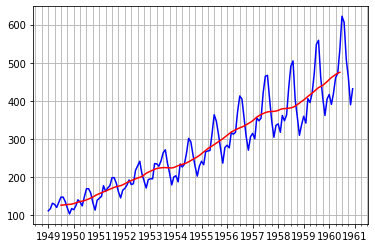

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(dataset.index, dataset['Passengers'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

Again, we can see the trend is going up against the individual observations.

# **AutoCorrelation and Partial Correlation**


>* Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

> * Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


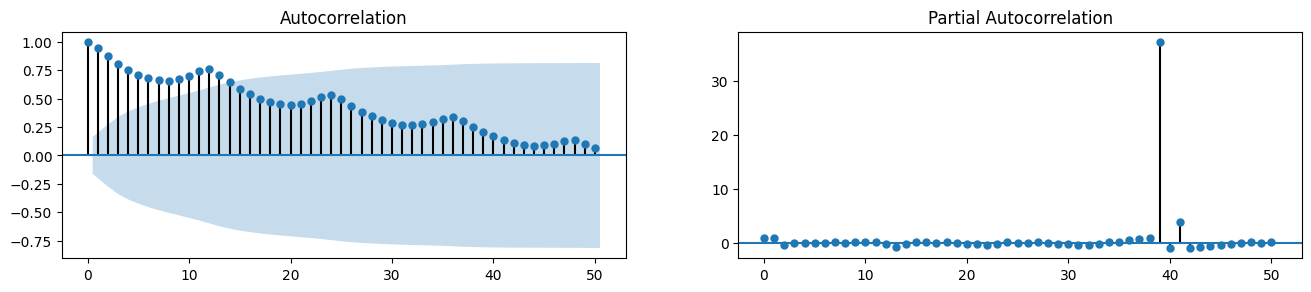

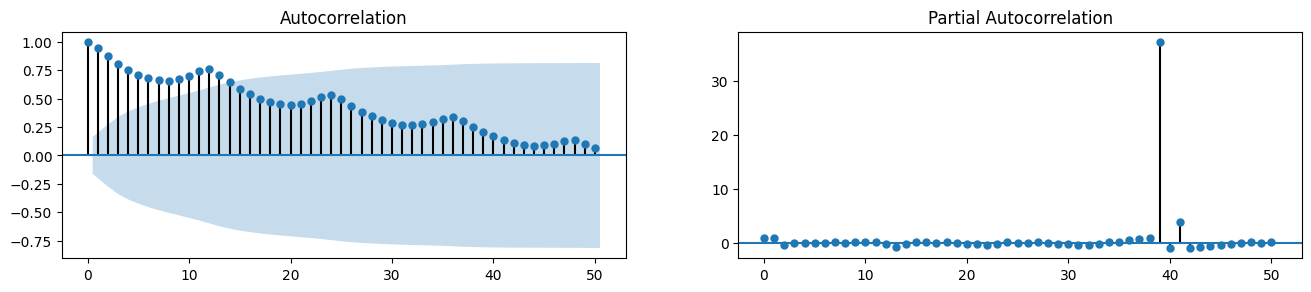

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset['Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(dataset['Passengers'].tolist(), lags=50, ax=axes[1])


The partial autocorrelation function of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

For example, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient α3 of Y_t-3 in the following equation:


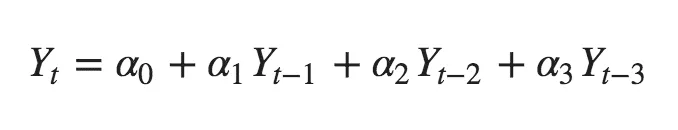

#**Stationary and Non-Stationary Time Series**

A stationary series is one where the values of the series is not a function of time. So, the values are independent of time.

> * Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time.

> * A stationary time series is independent of seasonal effects as well.


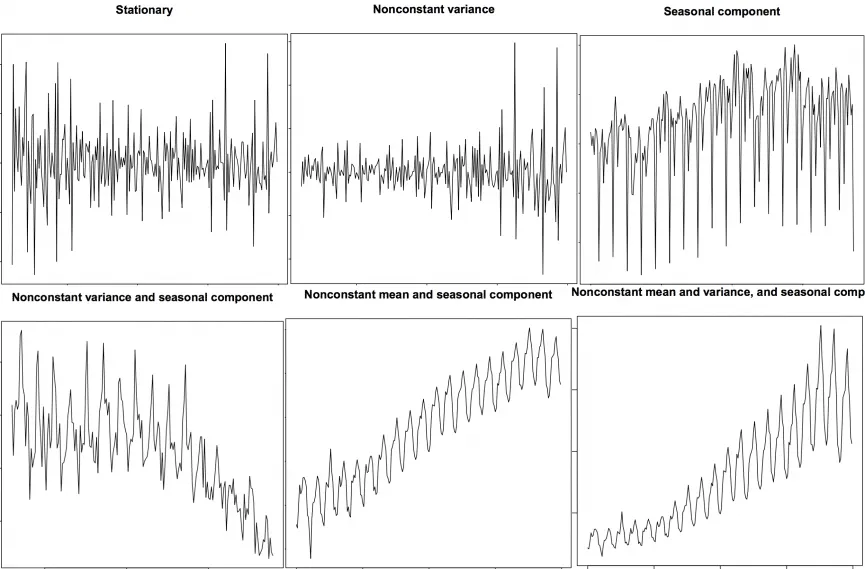

## **How to test for stationarity?**

### **Graphical Analysis**

The stationarity of a series can be checked by looking at the plot of the series.


Check if a data set or time series is random by Lag Plot

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

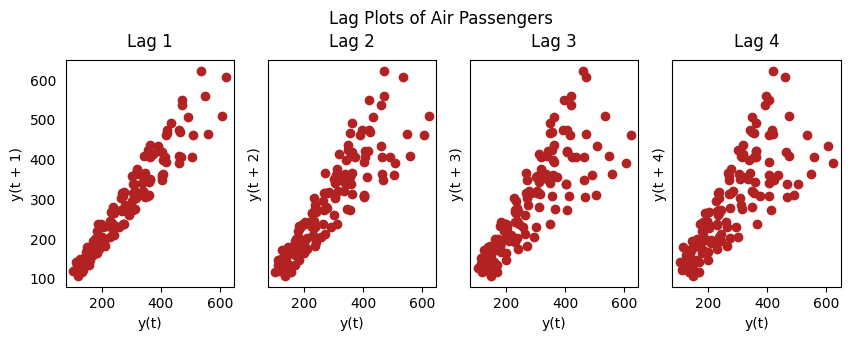

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(dataset['Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

### **Correlogram**

Through ACF and PACF

### **Unit Root Test**

There are several quantitative methods we can use to determine if a given series is stationary or not. This can be done using statistical tests called Unit Root Tests. This test checks if a time series is non-stationary and possess a unit root. 

####**1. Augmented Dickey Fuller test (ADF Test)**

Augmented Dickey Fuller test or (ADF Test) is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

ADF tests the null hypothesis that a unit root is present in time series sample. ADF statistic is a negative number and more negative it is the stronger the rejection of the hypothesis that there is a unit root.

> * Null Hypotehsis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
> * Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary.
> * p-value > 0.05: Accept H0, the data has a unit root and is non-stationary
> * p-value ≤ 0.05: Reject H0. the data does not have a unit root and is stationary

> * Test statistics: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series

In [ ]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries['Passengers'])
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

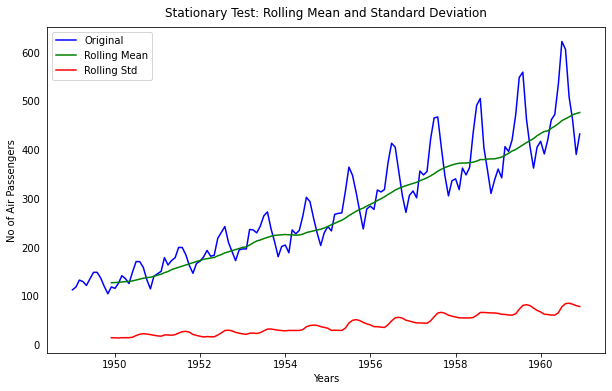

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
# Lets test the stationarity score with original series data
stationarity_test(dataset)

Though it's clear from visual observation that it's not a stationary series, but still lets have look at the rolling statistics and Duckey Fuller test results

> * Rolling statistics: Standard deviation has very less variation but mean is increasing continuously.
> * Duckey Fuller Test: Test statistic is way more than the critical values.


More negative ADF Statistic is the more likely we reject H0. In this case the stat is positive and way above any critical values. p-value is also way above 0.05 and we cannot reject H0. The data has a unit root and is non-stationary.

####**2.Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

Conversely to the Dickey-Fuller family of tests, the null hypothesis assumes stationarity around a mean or a linear trend, while the alternative is the presence of a unit root.

A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary.

So practically, the interpretaion of p-value is just the opposite to each other. 

That is, if p-value is < signif level (say 0.05), then the series is non-stationary. Whereas in ADF test, it would mean the tested series is stationary.

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries, regression='c'):
    # Whether stationary around constant 'c' or trend 'ct
    print ('Results of KPSS Test:')
    print('Null Hypothesis: Data is Stationary/Trend Stationary')
    print('Test Statistic > Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    kpsstest = kpss(timeseries, regression=regression)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value
    print (kpss_output, '\n')

In [ ]:
kpss_test(dataset['Passengers'], regression='c')

Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic          1.052175
p-value                 0.010000
Lags Used              14.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## **How to make a time series stationary?**


We can apply some sort of transformation to make the time-series stationary. These transformation may include:

1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above


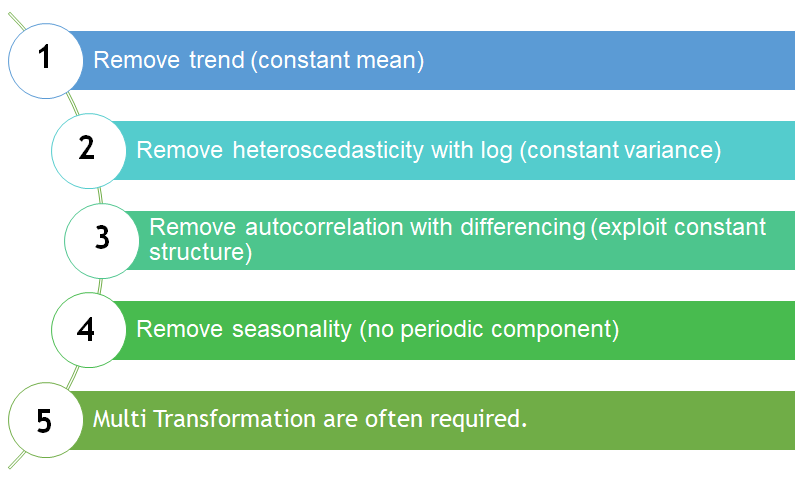

### **Differencing**

To transform the series using 'Differencing' we will use the diff() method of pandas. A benefit of using the Pandas function, in addition to requiring less code, is that it maintains the date-time information for the differenced series

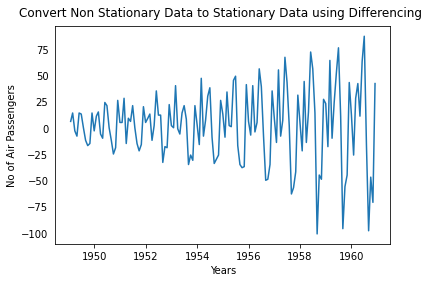

In [ ]:
df_diff = dataset.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

So from above graph its clear that differencing technique removed the trend from the time series, but variance is still there Now lets run the stationarity_test() to check the effectiveness of the 'Differencing' technique

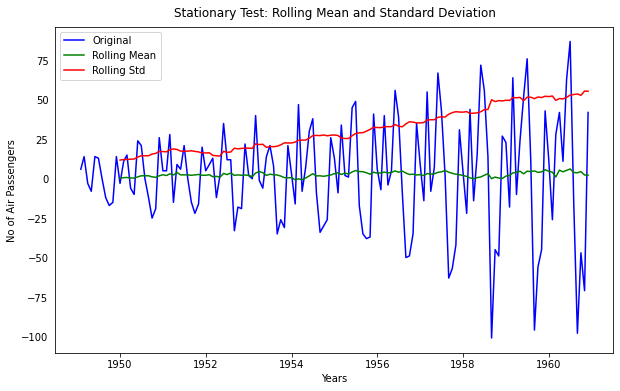

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

The rolling values appear to be varying slightly, and we can see there is slight upward trend in standard deviation. Also, the test statistic is smaller than the 10% critical but since p-value is greater than 0.05 it is not a stationary series.

Note that variance in the series is also affecting above results, which can be removed using transformation technique.

Let's also check with transformation technique

### **Transformation**

Since variance is proportional to the levels, we are going to use the log transformation.

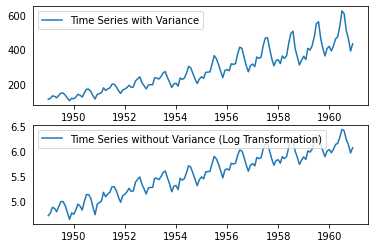

In [ ]:
df_log = np.log(dataset)

plt.subplot(211)
plt.plot(dataset, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()


Since log transformation has removed the variance from series, lets use this transformed data hence forward. Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back

In [ ]:
df = np.exp(df_log)

Let cross-check the differencing method scores with this log transformed data again.

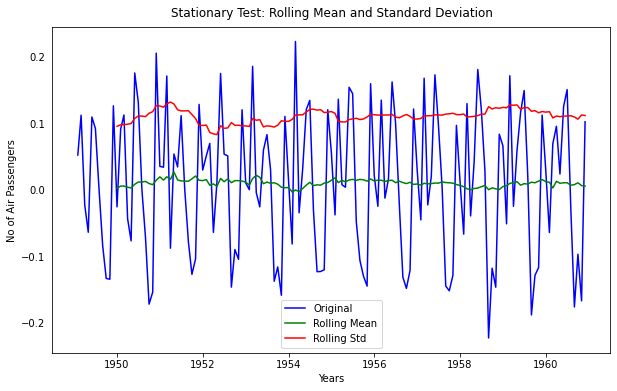

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

The rolling mean and standard deviation values are okay now. The test statistic is smaller than the 10% critical values but since p-value is greater than 0.05 it is not a stationary series.

### **Detrend a Time Series**

Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.

2. We subtract the trend component obtained from time series decomposition.

3. Subtract the mean.

4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Now, we will implement the first two methods to detrend a time series

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

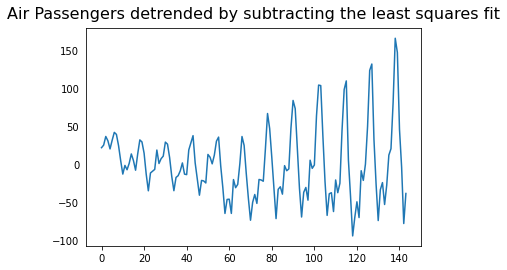

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(dataset['Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

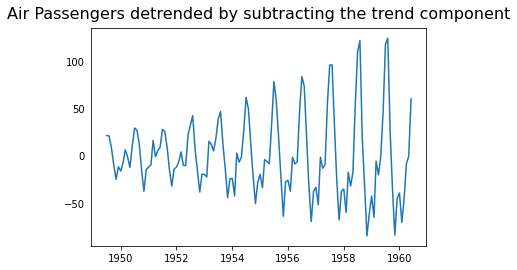

In [ ]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(dataset, model='multiplicative')
detrended = dataset.values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

### **Deseasonalize a Time Series**

There are multiple approaches to deseasonalize a time series. These approaches are listed below:

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.
2. Seasonal difference the series (subtract the value of previous season from the current value).
3. Divide the series by the seasonal index obtained from STL decomposition.

If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

[]

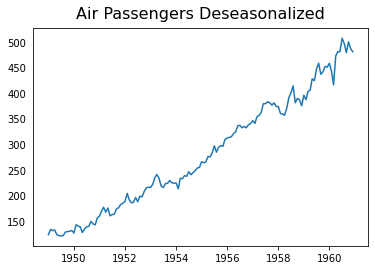

In [ ]:
# Subtracting the Trend Component
# Time Series Decomposition
result_mul = seasonal_decompose(dataset, model='multiplicative')

# Deseasonalize
deseasonalized = dataset.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()